In [2]:
# Find a good k using the elbow method on the California housing dataset (housing.csv).
# Assign the labels (clusters) from the good k to a new column in the dataset.

In [3]:
import pandas as pd
raw_df = pd.read_csv("housing.csv")
raw_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
raw_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Drop rows with null rather than replacing the nulls
non_null_df = raw_df.dropna()
non_null_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
relevant_df = non_null_df.drop(columns=["latitude", "longitude", "ocean_proximity"])
relevant_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [7]:
#encoded_df = pd.get_dummies(relevant_df, columns=["ocean_proximity"], drop_first=True)
#encoded_df
encoded_df = relevant_df

In [8]:
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame(StandardScaler().fit_transform(encoded_df), columns=list(encoded_df.columns))
scaled_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418
...,...,...,...,...,...,...,...
20428,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492
20429,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155
20430,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477
20431,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316


In [9]:
from sklearn.cluster import KMeans

inertia_by_k = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    # Inertia aka SSE: sum of distances of samples to their closest cluster center
    inertia_by_k[k] = kmeans.inertia_
sorted_inertia_by_k = list(sorted(list(inertia_by_k.items()), key=lambda item: item[1]))
sorted_inertia_by_k

[(29, 22080.532688645802),
 (28, 22416.643311159576),
 (27, 22856.11617756498),
 (26, 23266.93039015352),
 (25, 23749.976586546945),
 (24, 24211.67937329827),
 (23, 24713.02741419893),
 (22, 25289.928199580314),
 (21, 25899.36769648905),
 (20, 26518.891300578587),
 (19, 27217.77249430504),
 (18, 27946.184405098582),
 (17, 28727.308801092535),
 (16, 29570.69212130386),
 (15, 30503.658607368656),
 (14, 31568.44520560518),
 (13, 32632.93259124914),
 (12, 34256.574430360386),
 (11, 36071.40471505565),
 (10, 38134.287289334614),
 (9, 40262.962246137366),
 (8, 42953.63876852275),
 (7, 45988.91186613255),
 (6, 50345.829046223625),
 (5, 56172.06568765672),
 (4, 64498.03626301325),
 (3, 79157.93055818211),
 (2, 99736.89790603599),
 (1, 143031.00000000003)]

AttributeError: 'list' object has no attribute 'set_title'

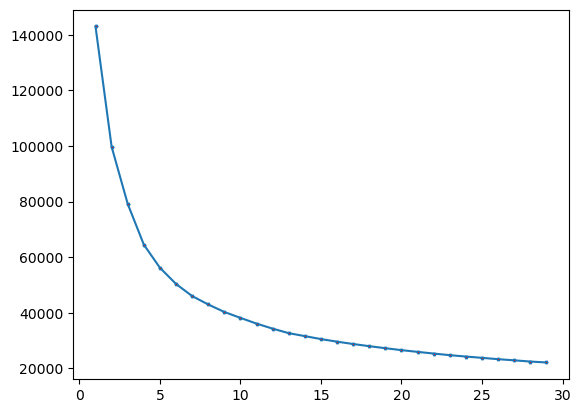

In [10]:
# Elbow graph
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.plot(list(inertia_by_k.keys()),
         list(inertia_by_k.values()),
         linestyle = '-',
         marker = 'H',
         markersize = 2,
         markerfacecolor = 'red')
fig.set_title("Elbow plot")
fig.set_xlabel("k")

In [ ]:
good_k = 10
good_kmeans = KMeans(n_clusters=good_k, random_state=0)
good_kmeans.fit(scaled_df)
labeled_df = scaled_df.copy()
labeled_df["label"] = good_kmeans.labels_
labeled_df